<a href="https://colab.research.google.com/github/Slrosales/Altera-VGA-Audio-Solution/blob/main/Audio%20Solution/Pre_procesamiento_de_audio_para_ser_reproducido_en_Nios_II_Assembly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [ ]:
%cd /content/drive/MyDrive/ProcesamientoDeAudio

/content/drive/MyDrive/ProcesamientoDeAudio


In [ ]:
!pip install librosa --upgrade
!pip install numba --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 14.5 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa
import librosa.display
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

# Procesamiento del audio

In [ ]:
arc = "a.mp3"

In [ ]:
# Cargar el archivo de audio
y, sr = librosa.load(arc, sr=None)  # sr=None para leer el sampling rate original

# Remuestrear el audio a 8kHz
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=8000)

# Guardar el audio remuestreado en formato .wav
sf.write('a.wav', y_resampled, 8000)


In [ ]:
y, sr = librosa.load(arc, sr=None)
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=8000)

# Recortar regiones silenciosas
y_trimmed, index = librosa.effects.trim(y_resampled, top_db=20)

# Convertir las muestras a enteros de 32 bits con signo (desde -2^31 a 2^31 - 1)
y_int32 = np.int32(y_trimmed * (2**31 - 1))

# Convertir a formato hexadecimal y guardar en el archivo de texto
with open('a.txt', 'w') as f:
    for sample in y_int32:
        hex_value = format(sample & 0xFFFFFFFF, '08x')  # Convertir a hexadecimal y asegurar 8 caracteres
        f.write("     .word 0x" + hex_value + "\n")

print("El archivo 'audio_hex.txt' ha sido generado.")


El archivo 'audio_hex.txt' ha sido generado.


# Graficas

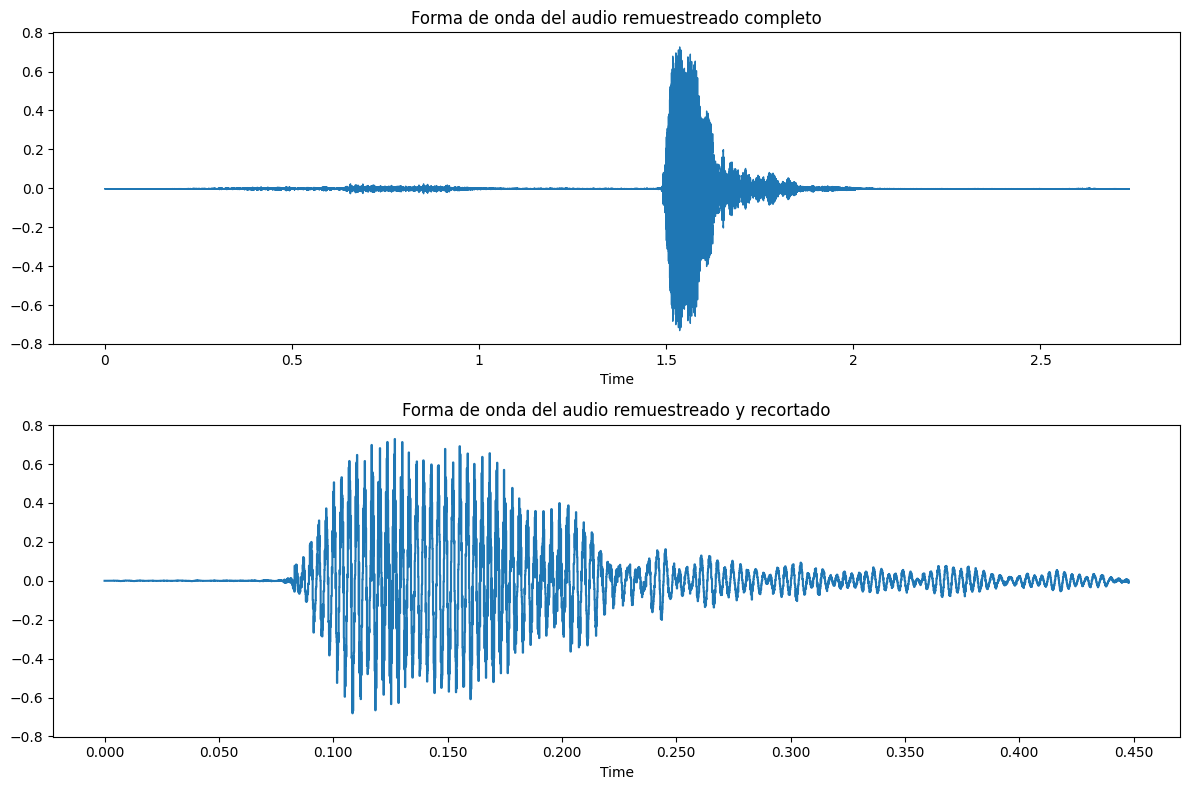

In [ ]:
y, sr = librosa.load(arc, sr=None)
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=8000)

# Recortar regiones silenciosas del audio remuestreado
y_trimmed, index = librosa.effects.trim(y_resampled, top_db=20)



plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y_resampled, sr=8000)
plt.title('Forma de onda del audio remuestreado completo')



plt.subplot(2, 1, 2)
librosa.display.waveshow(y_trimmed, sr=8000)
plt.title('Forma de onda del audio remuestreado y recortado')

plt.tight_layout()
plt.show()


Base hecha por prompt GPT

Moficicado por pr. Eduardo Zurek y est. Laura Gómez